# Lab 8: Define and Solve an ML Problem of Your Choosing

In [314]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [315]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

# My Findings!

1. I used the World Happiness dataset

2. I would like to predict the "Freedom to make life choices" using all the other columns as the features.

3. This would be a supervised learning problem because I will be using the "Freedom to make life choices" as the label and the dataset will provide the label for each row. This is a regression problem because we are going to try and predict a number for "Freedom to make life choices". 

4. FIRST TRY:   Life Ladder (happiness score), Log GDP per capita, Social support,
                Healthy life expectancy at birth, Generosity, Perceptions of corruption,
                Positive affect, Negative affect, Confidence in national government,
                Democratic Quality, Delivery Quality, GINI index (World Bank estimate),
                Gini of household income reported in Gallup

FINALIZED FEATURES: country, year, Happiness, LogGDP, Support, Life, Freedom, 
                    Generosity, Corruption, Positive, Negative, Happiness_STD,
                    Happiness_STD_MEAN_Ratio, Region_Asia, Region_Central America,
                    Region_Europe, Region_North America, Region_Oceania, Region_South America

UPDATE: I removed some features involving GDP because of their high NAN values and that helped me keep more data. I also am using scaled data because when I ran KNN with non-scaled data, my highest R Squared was around 20%, but with scaled data my highest R Squared was 60%! 

UPDATE: I decided to see how I can improve the df_scaled by looking at ouliers using IQR. I saw that there were many outliers, especially in the Corruption column. I decided to winsorize the data so that I didn't have to remove anymore data. After winsorizing with 0.02, R Squared increased from 60% to 61%, then when I winsorized with .03, R Squared increased to 62%. After winsorizing more harshly with the Corruption column, it then increased to 63%. 

UPDATE: After one-hot encoding the countries to their specific regions, I was able to increase R Squared to 65%! 

5. This is an important problem because with this model, we can predict how much freedom people have based on certain factors. Possibly government or political organizations would use this model to see where people feel they do have as much freedom.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

# Column Renaming

In [316]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [317]:
# YOUR CODE HERE
new_names_dict = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative',
            'Confidence in national government': 'Conf_Nat_Gov',
            'Democratic Quality': 'Democratic_Quality', 
            'Delivery Quality': 'Delivery_Quality', 
            'Standard deviation of ladder by country-year': 'Happiness_STD',
            'Standard deviation/Mean of ladder by country-year': 'Happiness_STD_MEAN_Ratio',
            'GINI index (World Bank estimate)': 'GINI_WBE',
            'GINI index (World Bank estimate), average 2000-15': 'GINI_WBE_AVG',
            'gini of household income reported in Gallup, by wp5-year': 'GINI_Income_wp5'
            }

df = df.rename(columns=new_names_dict)


In [318]:
# YOUR CODE HERE
print(df.columns)
print(df.shape)

Index(['country', 'year', 'Happiness', 'LogGDP', 'Support', 'Life', 'Freedom',
       'Generosity', 'Corruption', 'Positive', 'Negative', 'Conf_Nat_Gov',
       'Democratic_Quality', 'Delivery_Quality', 'Happiness_STD',
       'Happiness_STD_MEAN_Ratio', 'GINI_WBE', 'GINI_WBE_AVG',
       'GINI_Income_wp5'],
      dtype='object')
(1562, 19)


# Data Exploration

In [319]:
df.describe(include=['object'])

,country
count,1562
unique,164
top,South Korea
freq,12


In [320]:
df.describe(include=['float'])

,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative,Conf_Nat_Gov,Democratic_Quality,Delivery_Quality,Happiness_STD,Happiness_STD_MEAN_Ratio,GINI_WBE,GINI_WBE_AVG,GINI_Income_wp5
count,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


## Removing Null Values

In [321]:
df.isnull().sum()

country                       0
year                          0
Happiness                     0
LogGDP                       27
Support                      13
Life                          9
Freedom                      29
Generosity                   80
Corruption                   90
Positive                     18
Negative                     12
Conf_Nat_Gov                161
Democratic_Quality          171
Delivery_Quality            171
Happiness_STD                 0
Happiness_STD_MEAN_Ratio      0
GINI_WBE                    979
GINI_WBE_AVG                176
GINI_Income_wp5             357
dtype: int64

Only drop columns with high null values because dropping all null will reduce data from 1562 -> 382

In [322]:
# dropping columns entirely because too high NAN values

df = df.drop(columns=[
    'GINI_WBE', 
    'GINI_Income_wp5', 
    'GINI_WBE_AVG', 
    'Delivery_Quality',
    'Democratic_Quality',
    'Conf_Nat_Gov'
])

In [323]:
# df = df.fillna(df.mean(numeric_only=True))

In [324]:
print(df.isnull().sum())
print(df.shape)

country                      0
year                         0
Happiness                    0
LogGDP                      27
Support                     13
Life                         9
Freedom                     29
Generosity                  80
Corruption                  90
Positive                    18
Negative                    12
Happiness_STD                0
Happiness_STD_MEAN_Ratio     0
dtype: int64
(1562, 13)


In [325]:
df = df.dropna()
print(df.isnull().sum())
print(df.shape)

country                     0
year                        0
Happiness                   0
LogGDP                      0
Support                     0
Life                        0
Freedom                     0
Generosity                  0
Corruption                  0
Positive                    0
Negative                    0
Happiness_STD               0
Happiness_STD_MEAN_Ratio    0
dtype: int64
(1390, 13)


In [326]:
# Check how many duplicates
print("Num Duplicates:", df.duplicated().sum())  
df.dtypes


Num Duplicates: 0


country                      object
year                          int64
Happiness                   float64
LogGDP                      float64
Support                     float64
Life                        float64
Freedom                     float64
Generosity                  float64
Corruption                  float64
Positive                    float64
Negative                    float64
Happiness_STD               float64
Happiness_STD_MEAN_Ratio    float64
dtype: object

## One Hot Encoding Countries

In [327]:
len(df["country"].unique())

country_to_region = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Congo (Kinshasa)': 'Africa',
    'Djibouti': 'Africa', 'Egypt': 'Africa', 'Ethiopia': 'Africa', 'Gabon': 'Africa',
    'Ghana': 'Africa', 'Guinea': 'Africa', 'Ivory Coast': 'Africa', 'Kenya': 'Africa',
    'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa', 'Madagascar': 'Africa',
    'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa', 'Mauritius': 'Africa',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Senegal': 'Africa', 'Sierra Leone': 'Africa',
    'South Africa': 'Africa', 'South Sudan': 'Africa', 'Sudan': 'Africa', 'Swaziland': 'Africa',
    'Tanzania': 'Africa', 'Togo': 'Africa', 'Tunisia': 'Africa', 'Uganda': 'Africa',
    'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei': 'Asia', 'Cambodia': 'Asia',
    'China': 'Asia', 'Georgia': 'Asia', 'Hong Kong S.A.R. of China': 'Asia', 'India': 'Asia',
    'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia',
    'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Lebanon': 'Asia', 'Malaysia': 'Asia',
    'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia',
    'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestinian Territories': 'Asia',
    'Philippines': 'Asia', 'Qatar': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia',
    'South Korea': 'Asia', 'Sri Lanka': 'Asia', 'Syria': 'Asia', 'Taiwan Province of China': 'Asia',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Yemen': 'Asia',

    # Europe
    'Albania': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe', 'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe',
    'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe',
    'Kosovo': 'Europe', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Macedonia': 'Europe', 'Malta': 'Europe', 'Moldova': 'Europe', 'Montenegro': 'Europe',
    'Netherlands': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe',
    'Romania': 'Europe', 'Russia': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe',
    'Slovenia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Ukraine': 'Europe', 'United Kingdom': 'Europe',

    # North America
    'Canada': 'North America', 'United States': 'North America', 'Mexico': 'North America',

    # Central America & Caribbean
    'Belize': 'Central America', 'Costa Rica': 'Central America', 'Dominican Republic': 'Central America',
    'El Salvador': 'Central America', 'Guatemala': 'Central America', 'Haiti': 'Central America',
    'Honduras': 'Central America', 'Jamaica': 'Central America', 'Nicaragua': 'Central America',
    'Panama': 'Central America', 'Trinidad and Tobago': 'Central America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Guyana': 'South America', 'Paraguay': 'South America', 'Peru': 'South America',
    'Suriname': 'South America', 'Uruguay': 'South America', 'Venezuela': 'South America',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania'
}


df['Region'] = df['country'].map(country_to_region)
df = pd.get_dummies(df, columns=['Region'], drop_first=True)

df.columns

Index(['country', 'year', 'Happiness', 'LogGDP', 'Support', 'Life', 'Freedom',
       'Generosity', 'Corruption', 'Positive', 'Negative', 'Happiness_STD',
       'Happiness_STD_MEAN_Ratio', 'Region_Asia', 'Region_Central America',
       'Region_Europe', 'Region_North America', 'Region_Oceania',
       'Region_South America'],
      dtype='object')

In [328]:
df.drop(columns=['country'], inplace=True)
df.head()

,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative,Happiness_STD,Happiness_STD_MEAN_Ratio,Region_Asia,Region_Central America,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,1.774662,0.476600,1,0,0,0,0,0
1,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,1.722688,0.391362,1,0,0,0,0,0
2,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,1.878622,0.394803,1,0,0,0,0,0
3,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,1.785360,0.465942,1,0,0,0,0,0
4,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,1.798283,0.475367,1,0,0,0,0,0


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I do not have a new feature list, so far I am using all the columns minus the label as features.
2. I renamed the columns to make sure it is easier to call, I dropped NA values, and I checked the data types for each column to make sure it fit best for this regression problem I am doing.
3. I am doing a KNN model
4. I plan to train this KNN model and analyze to see how much it needs to improve. From there, I will check to see possibly which features I should drop or possibly change to make sure the model works better. And then, of course I plan to follow the usual model architecture where I will continue to test the model with the training and validation set until I am satisfied it is not overfitting or underfitting too much. I am also thinking about using an ANN if needed. And once I am confident, then I will test it on the testing set.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [329]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [330]:
# YOUR CODE HERE
y = df["Freedom"]
X = df.drop(columns=['Freedom'])

# Scaled Dataset

I added a scaled dataframe as well and will train 2 KNN models to see which one will perform better.

In [331]:
# 1. Create a StandardScaler object and save the result to variable scaler.
# YOUR CODE HERE
scaler = StandardScaler()

# 2. Extract numerical features from DataFrame df and save it to DataFrame df_to_scale.
# YOUR CODE HERE
cols_to_scale = [col for col in df.select_dtypes(include=[np.number]).columns if not col.startswith("Region_")]
df_to_scale = df[cols_to_scale]


# 3. Call the scaler.fit_transform() method to fit the scaler to data_to_scale
# and tranform the data. Save the result to transformed_data.
# YOUR CODE HERE
transformed_data = scaler.fit_transform(df_to_scale)


#4. Create new DataFrame df_scaled
# YOUR CODE HERE
df_scaled = df.copy()
df_scaled[cols_to_scale] = transformed_data 


# Inspect df_scaled
df_scaled

,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative,Happiness_STD,Happiness_STD_MEAN_Ratio,Region_Asia,Region_Central America,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,-1.180624,-1.482217,-1.688765,-2.964907,-1.576468,-0.040976,1.101072,0.672949,-1.750523,-0.061768,-0.587183,0.736166,1,0,0,0,0,0
1,-0.878624,-0.883179,-1.549098,-2.122280,-1.525515,-0.308069,1.234130,0.502435,-1.138975,-0.321899,-0.723303,0.020588,1,0,0,0,0,0
2,-0.576624,-0.568195,-1.504399,-2.231982,-1.478276,-0.844525,0.831296,-0.269403,-0.822171,0.149368,-0.314913,0.049475,1,0,0,0,0,0
3,-0.274624,-1.386707,-1.480383,-2.380963,-1.434254,-1.554353,1.061449,-0.138262,-0.885626,0.048916,-0.559166,0.646695,1,0,0,0,0,0
4,0.027376,-1.429796,-1.394004,-2.384833,-1.392244,-1.315757,1.499971,0.101534,0.027680,0.058093,-0.525319,0.725816,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,0.329375,-0.628429,-1.353375,-0.074985,-1.608399,-1.009631,-0.477287,0.399543,0.041525,-0.997459,-0.089201,0.251925,0,0,0,0,0,0
1558,0.631375,-1.075142,-1.355406,-0.352154,-1.473082,-0.559121,-0.289063,0.341794,0.164484,-0.297020,0.210525,0.906577,0,0,0,0,0,0
1559,0.933375,-1.500235,-1.361075,-0.601168,-1.365661,-0.387773,-0.586377,0.289215,0.070985,-1.039699,0.523802,1.719866,0,0,0,0,0,0
1560,1.235375,-1.471785,-1.375645,-0.330713,-1.258240,0.060209,-0.407491,-0.178648,0.279088,-0.673672,2.036264,2.974771,0,0,0,0,0,0


# Inspecting Scaled Data

In [332]:
df_scaled.describe(include=['float'])

,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative,Happiness_STD,Happiness_STD_MEAN_Ratio
count,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03
mean,1.760510e-14,-5.060700e-16,-9.201273e-16,4.345046e-16,2.811500e-16,8.306705e-17,-1.277955e-17,-9.891368e-16,1.068370e-15,-3.987218e-16,-3.488816e-16,-1.073482e-16
std,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00,1.000360e+00
min,-2.086623e+00,-2.420159e+00,-2.358162e+00,-4.295240e+00,-2.982250e+00,-3.177752e+00,-1.980561e+00,-3.887357e+00,-3.181771e+00,-2.081859e+00,-2.974728e+00,-2.140749e+00
25%,-8.786239e-01,-7.481484e-01,-7.864673e-01,-5.409334e-01,-6.624043e-01,-6.560790e-01,-6.928339e-01,-2.956620e-01,-8.240156e-01,-7.084159e-01,-6.978032e-01,-6.614406e-01
50%,2.737552e-02,-1.008466e-01,1.482119e-01,1.918341e-01,2.011218e-01,1.009511e-01,-1.363063e-01,2.911729e-01,7.759856e-02,-1.439561e-01,-1.144205e-01,-1.379993e-01
75%,9.333750e-01,7.041181e-01,8.038297e-01,7.964895e-01,7.369730e-01,7.963563e-01,5.750128e-01,6.685140e-01,8.591300e-01,5.673882e-01,5.580957e-01,5.540943e-01
max,1.537375e+00,2.269390e+00,2.119539e+00,1.484076e+00,1.780584e+00,1.777855e+00,4.077349e+00,1.220245e+00,2.179411e+00,5.440797e+00,4.004324e+00,5.321287e+00


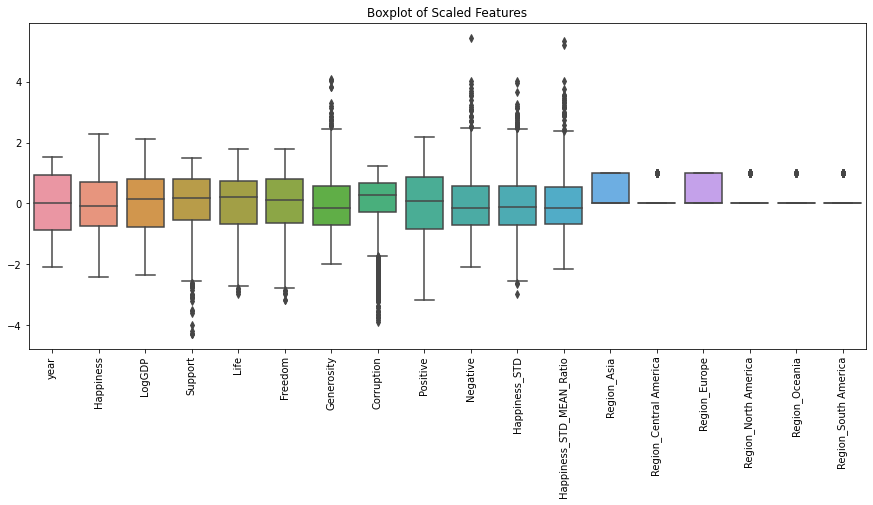

In [333]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features")
plt.show()


In [339]:
# Use scaled data
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

# Boolean DataFrame showing True where values are outliers
outliers = (df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))

# Count outliers per column
outliers.sum().sort_values(ascending=False)

Corruption                  130
Region_South America        117
Region_Central America      106
Happiness_STD                34
Region_North America         31
Happiness_STD_MEAN_Ratio     28
Support                      26
Negative                     24
Region_Oceania               21
Generosity                   20
Freedom                       6
Life                          5
Happiness                     0
LogGDP                        0
Positive                      0
Region_Asia                   0
Region_Europe                 0
year                          0
dtype: int64

## Winsorizing Scaled Data
I saw that there were many outliers in some columns in df_scaled but I did not want to lose any of that data so I decided to winsorize it instead. 

I first winsorized at 1% and 99% but that removed only 3 outliers, so I needed a stronger winsorization. I found that 3% and 97% worked best and I needed to handle the Corruption feature by itself because of it's high number of outliers.

In [340]:
from scipy.stats.mstats import winsorize

# Winsorize each column at 3% and 97%
df_winsorized = df_scaled.copy()
for col in df_scaled.columns:
    if not col.startswith("Region_"):
        df_winsorized[col] = winsorize(df_scaled[col], limits=[0.03, 0.03])
    
    
# Use winsorized data
Q1_winsorized = df_winsorized.quantile(0.25)
Q3_winsorized = df_winsorized.quantile(0.75)
IQR_winsorized = Q3 - Q1

# Boolean DataFrame showing True where values are outliers
outliers_winsorized = (df_winsorized < (Q1_winsorized - 1.5 * IQR_winsorized)) | (df_winsorized > (Q3_winsorized + 1.5 * IQR_winsorized))

# Count outliers per column
outliers_winsorized.sum().sort_values(ascending=False)

Corruption                  130
Region_South America        117
Region_Central America      106
Region_North America         31
Region_Oceania               21
Generosity                    0
Happiness                     0
LogGDP                        0
Support                       0
Life                          0
Freedom                       0
Positive                      0
Negative                      0
Happiness_STD                 0
Happiness_STD_MEAN_Ratio      0
Region_Asia                   0
Region_Europe                 0
year                          0
dtype: int64

### Reduce Outliers in Corruption Column

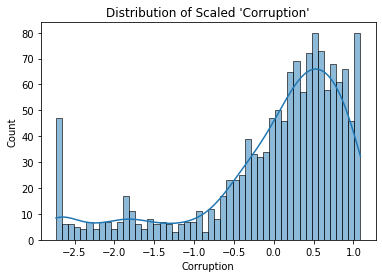

In [341]:
sns.histplot(df_winsorized["Corruption"], bins=50, kde=True)
plt.title("Distribution of Scaled 'Corruption'")
plt.show()


In [342]:
df_winsorized["Corruption"] = winsorize(df_winsorized["Corruption"], limits=[0.10, 0.10])

In [343]:
outliers_winsorized = (df_winsorized < (Q1_winsorized - 1.5 * IQR_winsorized)) | (df_winsorized > (Q3_winsorized + 1.5 * IQR_winsorized))
outliers_winsorized.sum().sort_values(ascending=False)

Region_South America        117
Region_Central America      106
Region_North America         31
Region_Oceania               21
Generosity                    0
Happiness                     0
LogGDP                        0
Support                       0
Life                          0
Freedom                       0
Positive                      0
Corruption                    0
Negative                      0
Happiness_STD                 0
Happiness_STD_MEAN_Ratio      0
Region_Asia                   0
Region_Europe                 0
year                          0
dtype: int64

In [344]:
df_winsorized.head()

,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative,Happiness_STD,Happiness_STD_MEAN_Ratio,Region_Asia,Region_Central America,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,-1.180624,-1.482217,-1.688765,-2.325338,-1.576468,-0.040976,1.101072,0.672949,-1.750523,-0.061768,-0.587183,0.736166,1,0,0,0,0,0
1,-0.878624,-0.883179,-1.549098,-2.122280,-1.525515,-0.308069,1.234130,0.502435,-1.138975,-0.321899,-0.723303,0.020588,1,0,0,0,0,0
2,-0.576624,-0.568195,-1.504399,-2.231982,-1.478276,-0.844525,0.831296,-0.269403,-0.822171,0.149368,-0.314913,0.049475,1,0,0,0,0,0
3,-0.274624,-1.386707,-1.480383,-2.325338,-1.434254,-1.554353,1.061449,-0.138262,-0.885626,0.048916,-0.559166,0.646695,1,0,0,0,0,0
4,0.027376,-1.429796,-1.394004,-2.325338,-1.392244,-1.315757,1.499971,0.101534,0.027680,0.058093,-0.525319,0.725816,1,0,0,0,0,0


# Preparing ML Model

In [345]:
# YOUR CODE HERE
y_winsorized = df_winsorized["Freedom"]
X_winsorized = df_winsorized.drop(columns=['Freedom'])

In [346]:
print("Number of examples: " + str(X_winsorized.shape[0]))
print("\nNumber of Features:" + str(X_winsorized.shape[1]))
print(str(list(X_winsorized.columns)))

Number of examples: 1390

Number of Features:17
['year', 'Happiness', 'LogGDP', 'Support', 'Life', 'Generosity', 'Corruption', 'Positive', 'Negative', 'Happiness_STD', 'Happiness_STD_MEAN_Ratio', 'Region_Asia', 'Region_Central America', 'Region_Europe', 'Region_North America', 'Region_Oceania', 'Region_South America']


In [350]:
X_train, X_test, y_train, y_test = train_test_split(X_winsorized, y_winsorized, test_size=.33, random_state=123)

print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(931, 17)
(931,)
(459,)


In [132]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    
   # YOUR CODE HERE
    model = KNeighborsRegressor(n_neighbors=k)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    r2 = r2_score(y_test, predictions)

    return r2

def visualize_accuracy(hyperparameters, acc):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    sns.lineplot(x=hyperparameters, y=acc)
    
    plt.title('Test set accuracy based on Hyperparameters')
    ax.set_xlabel('Hyperparameters')
    ax.set_ylabel('Accuracy')
    plt.show()

In [351]:
print(train_test_knn(X_train, X_test, y_train, y_test, 2))
print(train_test_knn(X_train, X_test, y_train, y_test, 5))
print(train_test_knn(X_train, X_test, y_train, y_test, 7))
print(train_test_knn(X_train, X_test, y_train, y_test, 10))

0.6566708629710574
0.6331656416975914
0.6062834252060907
0.588845930379943


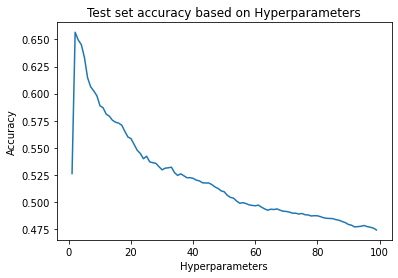

In [352]:
k_values = list(range(1, 100))
r2_scores = [train_test_knn(X_train, X_test, y_train, y_test, k) for k in k_values]

visualize_accuracy(k_values, r2_scores)